In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.linalg as la
import scipy.stats as st

def pairmul(v):
    vv = np.zeros((N,N))
    for i in np.arange(N):
        for j in np.arange(N):
            vv[i,j]=v[i]*v[j]
    return vv



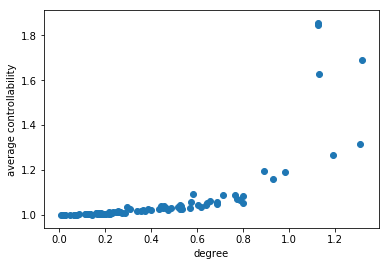

In [2]:
###The correlation plot for the degree vs average controllability for the MEAN of all subjects

#load the adjacency matrix
A =  np.load("HCP10_SCs_aal90_EVnorm.npy")
A = np.mean(A,axis=0)
N = A.shape[0]

######MEASURES###########
##Degree##
degree=np.sum(A,axis=0)


##Gramian, average controllability##
T,Z=la.schur(A)
midMat= (Z**2).transpose()
v=np.diag(T)
vv= pairmul(v)
P= np.repeat(np.diag(1-vv),N).reshape(N,N)
average_c=np.sum(midMat/P , axis=0).transpose()
plt.scatter(degree,average_c)


plt.xlabel('degree')
plt.ylabel('average controllability')
plt.show()

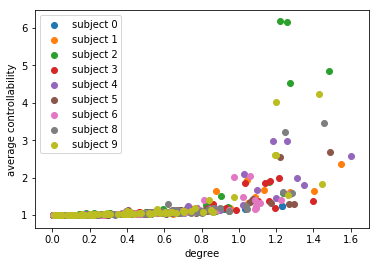

In [6]:
###The correlation plot for the degree vs average controllability for the INDIVIDUAL subjects 0,1,2,3,4,5,6,8,9
for i in np.arange(0,10):
    if i!=7:
        A =  np.load("HCP10_SCs_aal90_EVnorm.npy")
        A=A[i]#np.mean(A,axis=0)
        N = A.shape[0]

        ######MEASURES###########
        ##Degree##
        degree=np.sum(A,axis=0)


        ##Gramian, average controllability##
        T,Z=la.schur(A)
        midMat= (Z**2).transpose()
        v=np.diag(T)
        vv= pairmul(v)
        P= np.repeat(np.diag(1-vv),N).reshape(N,N)
        average_c=np.sum(midMat/P , axis=0).transpose()
        plt.scatter(degree,average_c,label='subject '+str(i))

plt.legend()
plt.xlabel('degree')
plt.ylabel('average controllability')
plt.show()